In [1]:
from brian2 import *
from brian2tools import *

The leaky integrate and fire neuron:

$$\tau \frac{dV}{dt} = -V$$

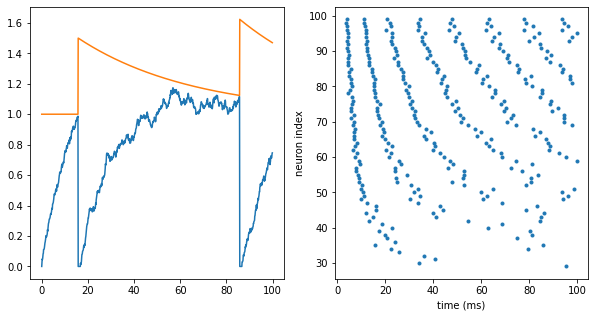

In [2]:
start_scope()

tau = 10 * ms
tau_t = 50 * ms
f = 100 * Hz
eqs = """
dv/dt = (I-v)/tau + 0.1*xi*tau**-0.5: 1 (unless refractory)
dvt/dt = (1-vt)/tau_t : 1
I : 1
"""
G = NeuronGroup(N=100,
                model=eqs, 
                threshold='v>vt',
                reset='v=0; vt+=0.5',
                refractory=1*ms,
                method='euler')
G.vt = 1
G.I = '3*i/(1.0*N)'

M = StateMonitor(source=G, variables=('v', 'vt'), record=[35])
spM = SpikeMonitor(source=G)

run(100 * ms)

figure(figsize=(10, 5))
subplot(121)
plot(M.t/ms, M.v[:].T)
plot(M.t/ms, M.vt[:].T)
subplot(122)
brian_plot(spM)
show()

<AxesSubplot:xlabel='time (ms)', ylabel='v'>

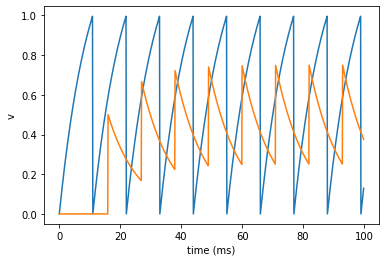

In [3]:
start_scope()

eqs = """
dv/dt = (I-v)/(10*ms) : 1
I : 1
"""

G = NeuronGroup(2, eqs, method='exact', threshold='v>1', reset='v=0')
G.I = [1.5, 0]

S = Synapses(G, G, 'w : 1', on_pre='v+=w')
S.connect(i=0, j=1)
S.w = 0.5
S.delay = 5 * ms

M = StateMonitor(G, 'v', record=True)

run(100*ms)

brian_plot(M)

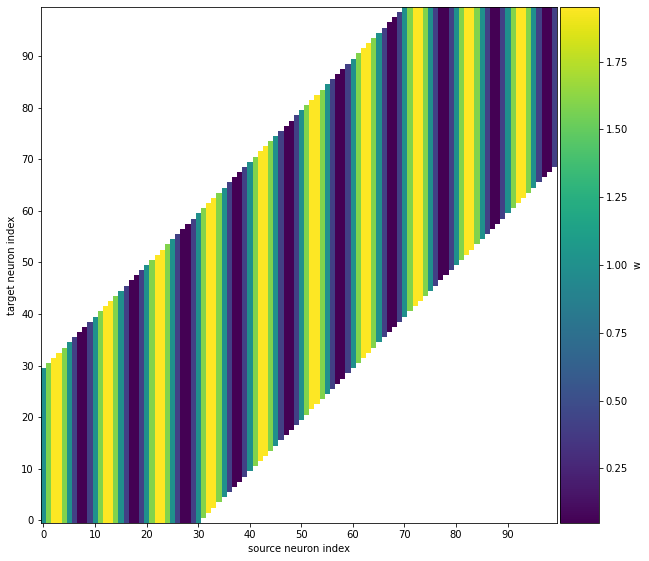

In [4]:
start_scope()

eqs = """
x : metre
"""

G = NeuronGroup(100, eqs)
G.x = '20*um*i'

S = Synapses(G, G, 'w : 1')
S.connect(j='k for k in range(i-30, i+30)', skip_if_invalid=True)
f = 1 / (200 * um)
S.w = '1+sin(2*pi*f*x_pre)'


figure(figsize=(10, 10))
brian_plot(S.w)
show()